Importing libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import  datetime,timedelta

Merging 12 months data into single file

In [2]:
df = pd.read_csv('./Sales_data/Sales_April_2019.csv')
files = [file for file in os.listdir('./Sales_data/')]
#print(files)
#one empty dataframe
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_data/' + file)
    all_months_data = pd.concat([all_months_data,df])
#passing all months data into a single csv file
all_months_data.to_csv('all_data.csv', index=False)
    

Read in updated dataframe

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()
all_data.shape


(186850, 6)

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
nan_df.shape

(545, 6)

In [5]:
all_data = all_data.dropna()
all_data.shape

(186305, 6)

Check the datatypes

In [6]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Check for Or in the order date column and delete it

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Add Month Column

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Convert columns to numeric

In [9]:
all_data['Quantity Ordered'] =pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

Add Sales Column

In [10]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Add City Column

In [11]:
def get_city(x):
    return x.split(',')[1]
def get_address(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)}({get_address(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


> Data Exploration!

**Question 1**: What was the best month for sales? How much was earned that month?

In [12]:
res = all_data.groupby(['Month']).sum()[['Quantity Ordered','Price Each','Sales']]
res

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


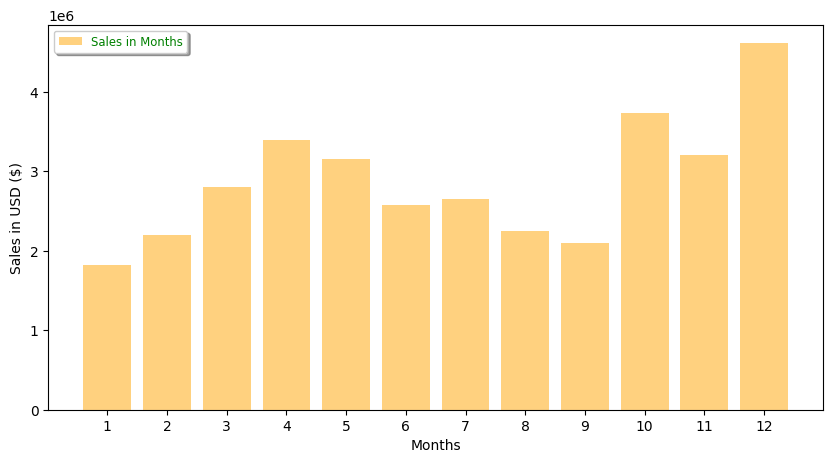

In [13]:
plt.figure(figsize=(10,5))
month = range(1,13)
plt.bar(x=month, height=res['Sales'],label='Sales in Months', color='Orange', alpha=0.5)
plt.xticks(month)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.legend(loc='best',shadow=True,fontsize='small',labelcolor='green')
plt.show()

**Conclusion-1** :  From the above graph we can conclude that the December month has more number of sales. 
As it is last month of the year, all retailers provides maximum discounts to make most of their sales.As it is the month of christmas and holiday shopping season encourages higher spending where people used to buy gifts for each other.It's a month when sales are generally at their highest.

**Question 2:** What city sold the most product?

In [14]:
res_city = all_data.groupby(['City']).sum()[['Sales']]
res_city

,Sales
City,
Atlanta(GA),2795498.58
Austin(TX),1819581.75
Boston(MA),3661642.01
Dallas(TX),2767975.40
Los Angeles(CA),5452570.80
New York City(NY),4664317.43
Portland(ME),449758.27
Portland(OR),1870732.34
San Francisco(CA),8262203.91


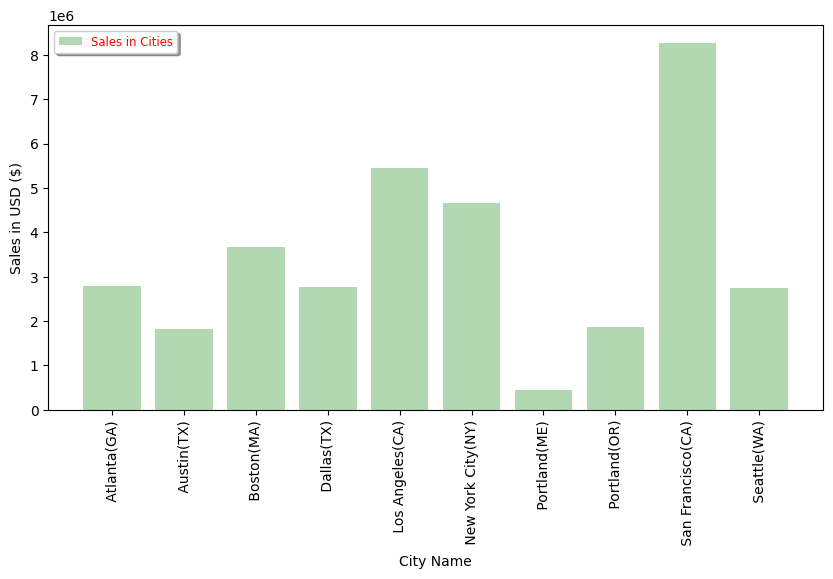

In [15]:
plt.figure(figsize=(10,5))
cities =[city for city,sales in all_data.groupby('City')]
plt.bar(cities, height=res_city['Sales'],label='Sales in Cities', color='Green', alpha=0.3)
plt.xticks(cities,rotation=90)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.legend(loc='best',shadow=True,fontsize='small',labelcolor='Red')
plt.show()

**Conclusion 2**: From the above graph we can conclude that the San Francisco City sold the maximum products (or) San Francisco City has maximum number of sales.
As San Francisco is the “Best Small Business City in America”.It has good skilled workforce, abundant venture capital, and innovation and entrepreneurial culture support.

 **Question 3**: What time should we display advertisements to maximize likelihood of customer's buying product?

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


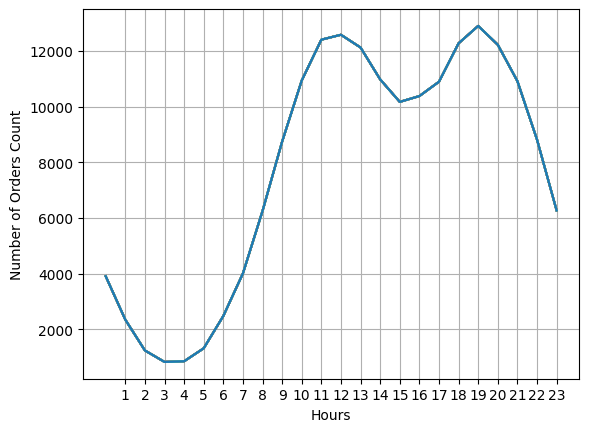

In [19]:
all_data['Count'] = 1
total_hours = [hour for hour, df in all_data.groupby(['Hour'])]
plt.plot(total_hours, all_data.groupby(['Hour']).count())
total_hours = range(1,24)
plt.xlabel('Hours')
plt.ylabel('Number of Orders Count')
plt.xticks(total_hours)
plt.grid()
plt.show()

**Conclusion 3**: To display advertisements the best time is between 11am to 7pm.
In that 11am to 12pm is the best time to display ads, due to increased usage after work and during lunch breaks. And evening 7pm it is also a best time when most people have free time to tune into the TV after work.

**Question 4**: What products are most often sold together?

In [43]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()


C:\Users\konge.shreesha\AppData\Local\Temp\ipykernel_17984\2275315762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [44]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter
count =Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,val in count.most_common(10):
    print(key,val)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


**Conclusion 4**:
 From the above calculation we can conclude that  
*)iPhone and Lightning Charging Cable    
*)Google Phone and USB-C Charging Cable    
These two combinations are most often sold together.
Because for every mobile phone we need charging cable.

**Question 5**: What product sold the most? Why do you think it sold the most ?

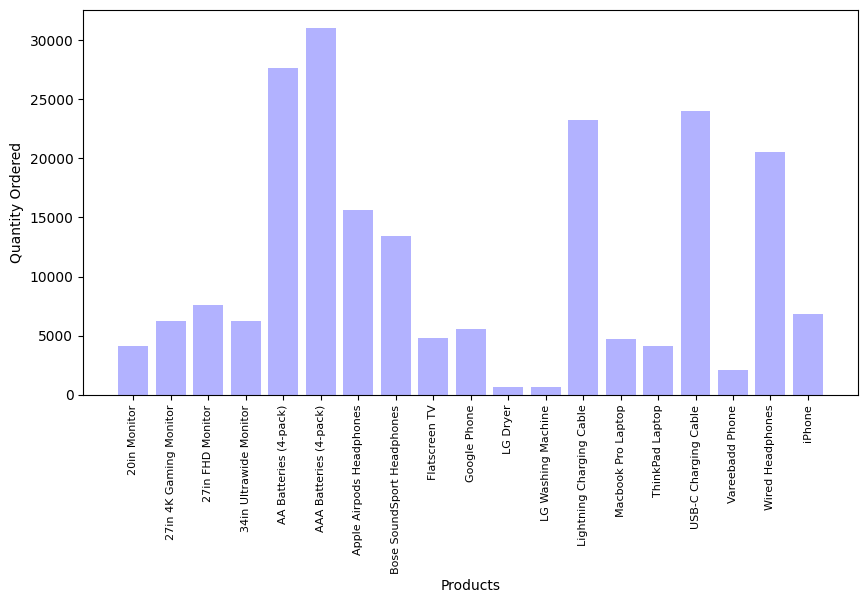

In [45]:
desired = all_data.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
products = [pair for pair, df in all_data.groupby('Product')]
quantity_ordered = all_data.groupby(['Product'])[desired].sum()['Quantity Ordered']
plt.figure(figsize=(10,5))
plt.bar(products,quantity_ordered,color='Blue',alpha=0.3)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()


**Conclusion 5**: From the above graph we can conclude that the product AAA Batteries sold the most.

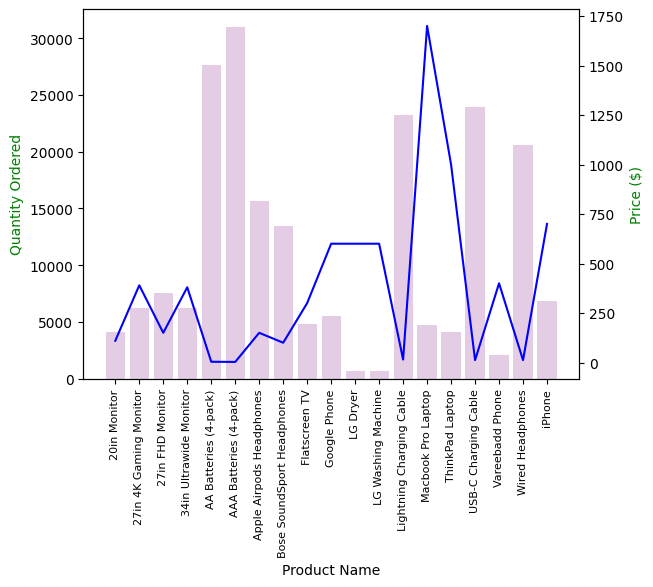

In [46]:
desired = all_data.select_dtypes(['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
prices = all_data.groupby('Product')[desired].mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='purple', alpha=0.2)
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='g')
ax1.set_xticks(ax1.get_xticks()) 
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

**Conclusion 6**: From the above graph , we can get a final conclusion as the price of the product increases product sales decreases and if the price of the product is cheaper then sales for that product increases. 
AAA Batteries has lower price range so it got sold the most, whereas MackBook Pro Laptop and ThinkPad Laptop has higher price range so it has less sales.

Increased prices typically result in lower demand, and if demand increases generally lead to increased supply; however, the supply of different products responds to demand differently.

